### First architecture: 
As a first architecture, we reshape the data in order to only learn the classes of each image. The comparison of labels is done as a post-processing step. 

In [14]:
import torch
from torch.autograd import Variable
from torch import nn
from torch.nn import functional as F
from torch.optim.lr_scheduler import StepLR
from torch.optim.lr_scheduler import MultiStepLR
import matplotlib.pyplot as plt
import numpy as np

import dlc_practical_prologue as prologue
%matplotlib inline

### Load data 

In [15]:
N = 10
train_input, train_target_final, train_classes, test_input, test_target_final,test_classes = prologue.generate_pair_sets(N)

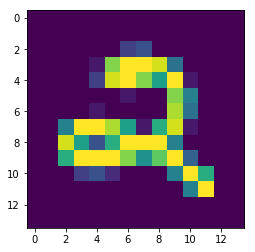

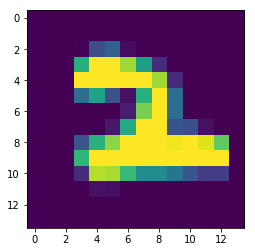

In [16]:
# Show images
img1 = train_input[5][0]
plt.imshow(img1)
plt.show()
img2 = train_input[5][1]
plt.imshow(img2)
plt.show()

### Define one-hot classes

In [17]:
train_binary_classes = torch.full((2*N,10), 0)
test_binary_classes = torch.full((2*N, 10), 0)
print(train_binary_classes)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [18]:
test_classes

tensor([[7, 9],
        [2, 8],
        [6, 4],
        [4, 2],
        [9, 4],
        [5, 4],
        [1, 1],
        [2, 0],
        [2, 1],
        [6, 8]])

In [19]:
train_binary_classes.scatter_(1,train_classes.reshape((2*N, 1)), 1)
test_binary_classes.scatter_(1,test_classes.reshape((2*N, 1)), 1)
print(train_binary_classes)

tensor([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [20]:
train_classes

tensor([[7, 9],
        [1, 8],
        [5, 3],
        [2, 2],
        [2, 1],
        [2, 2],
        [3, 4],
        [0, 6],
        [8, 2],
        [1, 4]])

In [21]:
train_binary_classes

tensor([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [22]:
train_input, train_target = Variable(train_input.reshape((2*N, 14*14))), Variable(train_binary_classes)
test_input, test_target = Variable(test_input.reshape((2*N, 14*14))), Variable(test_binary_classes)

### Standardize the data

In [23]:
mu = train_input.mean(dim=0)
std = train_input.std(dim=0)

In [24]:
train_input.sub_(mu).div_(std+1)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [25]:
test_input.sub_(mu).div_(std+1)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

### Functions to train the model

#### Computes error w.r.t classes 

In [26]:
def compute_nb_errors(output, target):
    #return (output.argmax(dim=1) != target.argmax(dim=1)).sum().item()
    return (torch.round(output)!=target).sum().item()

#### Computes error w.r.t final labels

In [27]:
def compute_errors_final(output, target, mini_batch_size):
    output_classes = output.reshape((mini_batch_size//2, 2, 10)).argmax(dim=2)
    target_classes = target.reshape((mini_batch_size//2, 2, 10)).argmax(dim=2)
    final_output = (output_classes[:,0] <= output_classes[:,1])
    final_target = (target_classes[:,0] <= target_classes[:,1])
    return (final_output != final_target).sum().item()

#### Trains the model

In [28]:
def train_model(model, train_input, train_target, test_input,
                test_target, mini_batch_size, n_epochs,milestone=[],learning_change=1):
    error_train_total = []
    error_test_total = []
    scheduler = MultiStepLR(optimizer, milestones=milestone, gamma=learning_change)
    for e in range(0, n_epochs):
        scheduler.step()
        sum_loss = 0
        sum_error = 0
        sum_error_final = 0
        
        # We do this with mini-batches
        for b in range(0, train_input.size(0), mini_batch_size):
            output = model(train_input.narrow(0, b, mini_batch_size))
            
            train_target_batch = train_target.narrow(0, b, mini_batch_size)
            loss = criterion(output, train_target_batch)
            sum_error += compute_nb_errors(output, train_target_batch)/mini_batch_size
            #sum_error_final += compute_errors_final(output, train_target_batch, mini_batch_size)
            sum_loss = sum_loss + loss.item()/mini_batch_size
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        output_test = model(test_input)
        test_error = compute_nb_errors(output_test, test_target)
        error_test_total.append((1/N)*50*test_error)
        error_train_total.append((1/N)*50*sum_error)
        test_error_final = compute_errors_final(output_test, test_target, 2*N)
        print('Epoch: {}, Loss: {}, Training error: {}%, Final training error: {}%, Test error: {}%, Final test error: {}%'.format(e, sum_loss, 50*sum_error/N, 100*sum_error_final/N, 50*test_error/N, 100*test_error_final/N))
        #if (e %1 == 0):
            #print('Epoch: {}, Loss: {}, Training error: {}%,, Test error: {}%'.format(e, sum_loss, error_train_total[e], error_test_total[e]))
    return error_train_total,error_test_total,test_error_final

In [29]:
def train_model_2_images(model, train_input, train_target, test_input,
                test_target, mini_batch_size, n_epochs,milestone=[],learning_change=1):
    error_train_total = []
    error_test_total = []
    scheduler = MultiStepLR(optimizer, milestones=milestone, gamma=learning_change)
    for e in range(0, n_epochs):
        scheduler.step()
        sum_loss = 0
        sum_error = 0
        sum_error_final = 0
        
        # We do this with mini-batches
        for b in range(0, train_input.size(0), mini_batch_size):
            output = model(train_input.narrow(0, b, mini_batch_size))
            train_target_batch = train_target.narrow(0, b, mini_batch_size)
            loss = criterion(output, train_target_batch)
            sum_error += compute_nb_errors(output, train_target_batch)/mini_batch_size
            #sum_error_final += compute_errors_final(output, train_target_batch, mini_batch_size)
            sum_loss = sum_loss + loss.item()/mini_batch_size
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        output_test = model(test_input)
        test_error = compute_nb_errors(output_test, test_target)
        error_test_total.append((1/N)*100*test_error)
        error_train_total.append((1/N)*100*sum_error)
        if (e %1 == 0):
            print('Epoch: {}, Loss: {}, Training error: {}%,, Test error: {}%'.format(e, sum_loss, error_train_total[e], error_test_total[e]))
    return error_train_total,error_test_total

### First network: MLP

In [30]:
d = train_input.shape[1]
h1 = 50
h2 = 50
d_out = train_target.shape[1]
VanillaNN = nn.Sequential(
      nn.Linear(d, h1, bias=True),
      nn.ReLU(),
      nn.Linear(h1, h2, bias=True),
      nn.ReLU(),
      nn.Linear(h2, d_out),
      nn.ReLU(),
      )

In [31]:
model, criterion,  = VanillaNN, nn.MSELoss()
eta, mini_batch_size = 1e-3, 10
optimizer = torch.optim.Adam(model.parameters(), lr=eta)
n_epochs = 10

In [32]:
train_input.shape

torch.Size([20, 196])

In [311]:
train_model(model, train_input, train_target, test_input,
                test_target, mini_batch_size, n_epochs);

Epoch: 0, Loss: 1.2203770287334912, Training error: 6.934999999999998%, Final training error: 0.0%, Test error: 43.8%, Final test error: 24.2%
Epoch: 1, Loss: 0.745016082795337, Training error: 3.970000000000001%, Final training error: 0.0%, Test error: 39.3%, Final test error: 22.9%
Epoch: 2, Loss: 0.6552721269428732, Training error: 3.325000000000001%, Final training error: 0.0%, Test error: 38.55%, Final test error: 22.7%
Epoch: 3, Loss: 0.6045750941033474, Training error: 2.9700000000000006%, Final training error: 0.0%, Test error: 37.05%, Final test error: 22.0%
Epoch: 4, Loss: 0.5707205858896485, Training error: 2.715%, Final training error: 0.0%, Test error: 36.75%, Final test error: 22.2%
Epoch: 5, Loss: 0.5493791301385502, Training error: 2.595000000000001%, Final training error: 0.0%, Test error: 36.05%, Final test error: 22.2%
Epoch: 6, Loss: 0.532720469089691, Training error: 2.470000000000001%, Final training error: 0.0%, Test error: 35.85%, Final test error: 22.3%
Epoch: 

### Second network: modified LeNet

In [356]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3)
        self.fc1 = nn.Linear(64, 20)
        self.fc2 = nn.Linear(20, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), kernel_size=2, stride=2))
        x = F.relu(F.max_pool2d(self.conv2(x), kernel_size=2))
        x = F.relu(self.fc1(x.view(-1, 64)))
        x = self.fc2(x)
        return x

In [357]:
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3)
        self.fc1 = nn.Linear(64, 20)
        self.fc2 = nn.Linear(20, 10)
        self.dropout = nn.Dropout()

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), kernel_size=2, stride=2))
        x = F.relu(F.max_pool2d(self.conv2(x), kernel_size=2))
        x = F.relu(self.fc1(x.view(-1, 64)))
        x = self.fc2(x)
        return x

In [469]:
class ModelDrop(nn.Module):
    def __init__(self):
        super(ModelDrop, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.fc1 = nn.Linear(128, 128)
        self.fc2 = nn.Linear(128, 10)
        #self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), kernel_size=6,stride=6))
        x = x.view(-1, 128)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        return x

In [470]:
train_input, train_target = Variable(train_input.reshape((2*N,1, 14, 14))), Variable(train_binary_classes)
test_input, test_target = Variable(test_input.reshape((2*N,1, 14, 14))), Variable(test_binary_classes)
model, criterion = ModelDrop(), nn.MSELoss()
eta, mini_batch_size = 1e-3, 10
optimizer = torch.optim.Adam(model.parameters(), lr=eta)

In [471]:
n_epochs = 50
error_train_total_net,error_test_total_net,test_error_final = train_model(model, train_input, train_target, test_input, test_target, mini_batch_size, n_epochs,milestone=[],learning_change=0.1)

Epoch: 0, Loss: 9.121820111572724, Training error: 9.209999999999944%, Final training error: 0.0%, Test error: 85.77%, Final test error: 40.82%
Epoch: 1, Loss: 8.388273506239042, Training error: 8.460999999999963%, Final training error: 0.0%, Test error: 83.81%, Final test error: 34.58%
Epoch: 2, Loss: 8.296080698817963, Training error: 8.326999999999964%, Final training error: 0.0%, Test error: 84.52%, Final test error: 34.36%
Epoch: 3, Loss: 8.245666700601566, Training error: 8.263999999999962%, Final training error: 0.0%, Test error: 83.56%, Final test error: 34.36%
Epoch: 4, Loss: 8.219289639219635, Training error: 8.241999999999967%, Final training error: 0.0%, Test error: 82.02%, Final test error: 34.98%
Epoch: 5, Loss: 7.538404579460611, Training error: 7.611000000000009%, Final training error: 0.0%, Test error: 74.42%, Final test error: 37.72%
Epoch: 6, Loss: 7.309447089768944, Training error: 7.3440000000000145%, Final training error: 0.0%, Test error: 73.45%, Final test error

In [472]:
model.train(False)
model.dropout.training
output_test = model(test_input)
test_error = (1/N)*50*compute_nb_errors(output_test, test_target)
test_error_final = (1/N)*100*compute_errors_final(output_test, test_target, 2*N)

model.train(True)
test_error_final

AttributeError: 'ModelDrop' object has no attribute 'dropout'

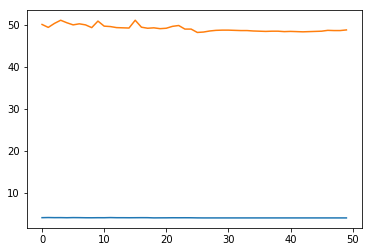

In [400]:
plt.plot(error_train_total_net)
plt.plot(error_test_total_net)
plt.show()

### Third network: with two images

In [419]:
class Comparaison(nn.Module):
    def __init__(self):
        super(Comparaison,self).__init__()
        self.conv1 = nn.Conv2d(2,128,kernel_size=2)
        self.conv2 = nn.Conv2d(128,1,kernel_size=3)
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(F.max_pool2d(x,kernel_size=4))
        x = self.conv2(x)
        x = x.flatten()
        return x

In [430]:
N = 1000
train_input, train_target_final, train_classes, test_input, test_target_final,test_classes = prologue.generate_pair_sets(N)

In [431]:
train_input, train_target_final, test_input, test_target_final = train_input.float(), train_target_final.float(), test_input.float(), test_target_final.float()

In [432]:
mu = train_input.mean(dim=0)
std = train_input.std(dim=0)

In [433]:
train_input.sub_(mu).div_(std+1)
test_input.sub_(mu).div_(std+1);

In [436]:
model, criterion,  = Comparaison(), nn.MSELoss()
eta, mini_batch_size = 1e-3, 10
optimizer = torch.optim.Adam(model.parameters(), lr=eta)
n_epochs = 100
e_tr_t, e_te_t = train_model_2_images(model, train_input, train_target_final, test_input, test_target_final, mini_batch_size, n_epochs,[50],0.1)

Epoch: 0, Loss: 3.618346766382455, Training error: 4.469999999999998%,, Test error: 42.7%
Epoch: 1, Loss: 2.2139418669044977, Training error: 3.32%,, Test error: 39.5%
Epoch: 2, Loss: 1.9535735823214055, Training error: 2.9099999999999993%,, Test error: 35.9%
Epoch: 3, Loss: 1.8229270432144404, Training error: 2.75%,, Test error: 35.1%
Epoch: 4, Loss: 1.7421726554632184, Training error: 2.54%,, Test error: 35.0%
Epoch: 5, Loss: 1.7032637700438504, Training error: 2.44%,, Test error: 36.5%
Epoch: 6, Loss: 1.7160469975322488, Training error: 2.5000000000000004%,, Test error: 38.1%
Epoch: 7, Loss: 1.7911018244922157, Training error: 2.6300000000000003%,, Test error: 37.4%
Epoch: 8, Loss: 1.916731396690011, Training error: 2.79%,, Test error: 32.9%
Epoch: 9, Loss: 1.965693486481905, Training error: 2.68%,, Test error: 29.1%
Epoch: 10, Loss: 1.7831852182745938, Training error: 2.49%,, Test error: 27.5%
Epoch: 11, Loss: 1.4439104095101354, Training error: 1.92%,, Test error: 26.9000000000000

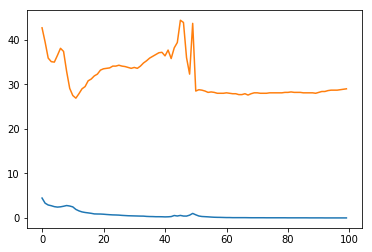

In [437]:
plt.plot(e_tr_t)
plt.plot(e_te_t)
plt.show()

In [426]:
e_tr_t2, e_te_t2 = train_model(model, train_input, train_target_final, test_input, test_target_final, mini_batch_size, 100)

RuntimeError: shape '[5000, 2, 10]' is invalid for input of size 5000

In [106]:
e_tr_t += e_tr_t2
e_te_t += e_te_t2

### Fourth network: with two images

In [146]:
class Comparaison2(nn.Module):
    def __init__(self):
        super(Comparaison2, self).__init__()
        self.conv1 = nn.Conv2d(2, 8, kernel_size=3)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3)
        self.fc1 = nn.Linear(64, 20)
        self.fc2 = nn.Linear(20, 1)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), kernel_size=2, stride=2))
        x = F.relu(F.max_pool2d(self.conv2(x), kernel_size=2))
        x = F.relu(self.fc1(x.view(-1, 64)))
        x = self.fc2(x)
        x = x.flatten()
        return x

In [213]:
N = 5000
train_input, train_target_final, train_classes, test_input, test_target_final,test_classes = prologue.generate_pair_sets(N)
train_input, train_target_final, test_input, test_target_final = train_input.float(), train_target_final.float(), test_input.float(), test_target_final.float()

mu = train_input.mean(dim=0)
std = train_input.std(dim=0)

train_input.sub_(mu).div_(std+1)
test_input.sub_(mu).div_(std+1);

In [215]:
model, criterion,  = Comparaison2(), nn.MSELoss()
eta, mini_batch_size = 1e-2, 10
optimizer = torch.optim.Adam(model.parameters(), lr=eta)
n_epochs = 100
e_tr_t, e_te_t = train_model(model, train_input, train_target_final, test_input, test_target_final, mini_batch_size, n_epochs,[5,25],0.1)

Epoch: 0, Loss: 9.969507745653393, Training error: 3.04%,, Test error: 22.400000000000002%
Epoch: 1, Loss: 7.787267778441308, Training error: 2.139999999999999%,, Test error: 20.26%
Epoch: 2, Loss: 7.230810284800827, Training error: 1.9240000000000002%,, Test error: 18.68%
Epoch: 3, Loss: 6.7456429040059405, Training error: 1.7820000000000016%,, Test error: 18.68%
Epoch: 4, Loss: 6.5633667634800075, Training error: 1.7220000000000022%,, Test error: 19.44%
Epoch: 5, Loss: 5.53071109466254, Training error: 1.4060000000000046%,, Test error: 17.38%
Epoch: 6, Loss: 5.287486753147091, Training error: 1.310000000000006%,, Test error: 17.16%
Epoch: 7, Loss: 5.189772662892936, Training error: 1.2820000000000058%,, Test error: 17.2%
Epoch: 8, Loss: 5.113466567732393, Training error: 1.2720000000000062%,, Test error: 17.34%
Epoch: 9, Loss: 5.046294113900512, Training error: 1.2220000000000062%,, Test error: 17.12%
Epoch: 10, Loss: 4.980012051668012, Training error: 1.214000000000006%,, Test error

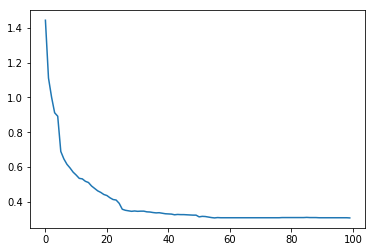

In [206]:
plt.plot(e_tr_t)
plt.show()

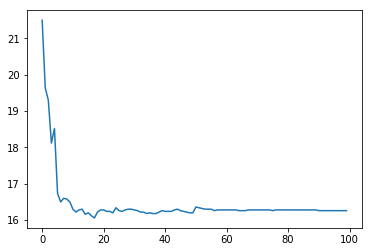

In [207]:
plt.plot(e_te_t)
plt.show()